In [1]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [10]:
import json
from datetime import datetime

In [138]:
# note!

# countepart GCNs are done after Event GCN Circular, not notice 
# Event notice is sent earlier and used to treat the data
# one reason of the IBAS GRB delay is packets not written to files fast enough (~30 min)
# counterpart GCNs sometimes wait for NRT data: +3 ti 5 hours

In [185]:
counterpart_gcn_reactions = json.load(open("counterpart_gcn_reaction_summary.json"))

counterpart_gcn_reactions

[{'event': 'LIGO/Virgo S191204r',
  'event_gcn_time': '19/12/04 18:41:47 GMT',
  'counterpart_gcn_time': '19/12/04 18:31:28 GMT',
  'event_t0': '2019-12-04 17:15:26',
  'instrument': ['acs']},
 {'event': 'LIGO/Virgo S200316bj',
  'event_gcn_time': '20/03/16 22:28:06 GMT',
  'counterpart_gcn_time': '20/03/17 11:34:02 GMT',
  'event_t0': '2020-03-16 21:57:56',
  'instrument': ['acs', 'ibis']},
 {'event': 'LIGO/Virgo S190602aq',
  'event_gcn_time': '19/06/02 18:36:06 GMT',
  'counterpart_gcn_time': '19/06/03 08:50:54 GMT',
  'event_t0': '2019-06-02 17:59:27',
  'instrument': ['ibis', 'acs']},
 {'event': 'LIGO/Virgo S190718y',
  'event_gcn_time': '19/07/18 16:07:48 GMT',
  'counterpart_gcn_time': '19/07/18 16:53:50 GMT',
  'event_t0': '2019-07-18 14:35:12',
  'instrument': ['acs']},
 {'event': 'LIGO/Virgo S191213g',
  'event_gcn_time': '19/12/13 05:38:52 GMT',
  'counterpart_gcn_time': '19/12/13 05:24:34 GMT',
  'event_t0': '2019-12-13 04:34:08',
  'instrument': ['acs']},
 {'event': 'LIGO/

In [79]:
grb_gcn_reactions = json.load(open("grb_gcn_reaction_summary.json"))
grb_gcn_reactions

[{'event': 'GRB 120711A',
  'event_t0': '2012-07-11 02:44:48',
  'event_gcn_time': '12/07/11 04:28:05 GMT'},
 {'event': 'GRB 070311',
  'event_t0': '2007-03-11 01:52:50',
  'event_gcn_time': '07/03/11 03:06:14 GMT'},
 {'event': 'GRB021219',
  'event_t0': '2002-12-19 07:33:57',
  'event_gcn_time': '02/12/19 12:36:03 GMT'},
 {'event': 'GRB 081226B',
  'event_t0': '2008-12-26 12:13:11',
  'event_gcn_time': '08/12/26 14:24:19 GMT'},
 {'event': 'GRB 131224A',
  'event_t0': '2013-12-24 16:54:37',
  'event_gcn_time': '13/12/24 18:17:19 GMT'},
 {'event': 'GRB 071109',
  'event_t0': '2007-11-09 20:36:05',
  'event_gcn_time': '07/11/09 21:41:34 GMT'},
 {'event': 'GRB 180222A',
  'event_t0': '2018-02-22 13:10:02',
  'event_gcn_time': '18/02/22 14:19:25 GMT'},
 {'event': 'GRB 130514B',
  'event_t0': '2013-05-14 13:26:32',
  'event_gcn_time': '13/05/14 14:56:00 GMT'},
 {'event': 'GRB 050502',
  'event_t0': '2005-05-02 02:13:56',
  'event_gcn_time': '05/05/02 10:19:06 GMT'},
 {'event': 'GRB 160223B'

In [42]:
def dt(x):
    try:
        return datetime.strptime(x, "%y/%m/%d %H:%M:%S GMT")
    except:
        return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    
ts = lambda x:dt(x).timestamp()

In [25]:
import matplotlib.font_manager as font_manager

<IPython.core.display.Javascript object>


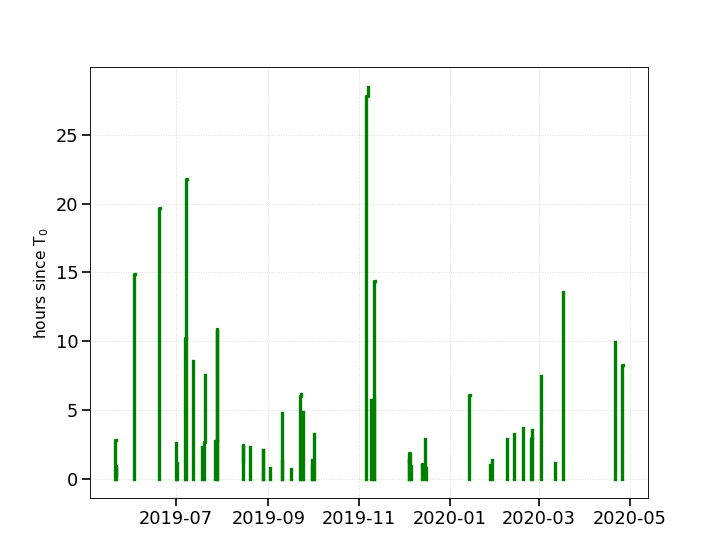

Text(0, 0.5, 'hours since T$_{0}$')

In [96]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

for E in counterpart_gcn_reactions:
    plt.plot(
            [dt(E['event_t0']), dt(E['event_gcn_time']), dt(E['counterpart_gcn_time'])],        
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600., (ts(E['counterpart_gcn_time'])-ts(E['event_t0']))/3600.], 
            lw=3,
            c='g',
            ds='steps'
        )

ax.set_ylabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

    

In [100]:
from collections import defaultdict

counterpart_gcn_reactions_by_year=defaultdict(list)
for E in counterpart_gcn_reactions:
    counterpart_gcn_reactions_by_year[dt(E['event_t0']).year].append(E)
    

grb_gcn_reactions_by_year = defaultdict(list)
for E in grb_gcn_reactions:
    grb_gcn_reactions_by_year[dt(E['event_t0']).year].append(E)
    

<IPython.core.display.Javascript object>


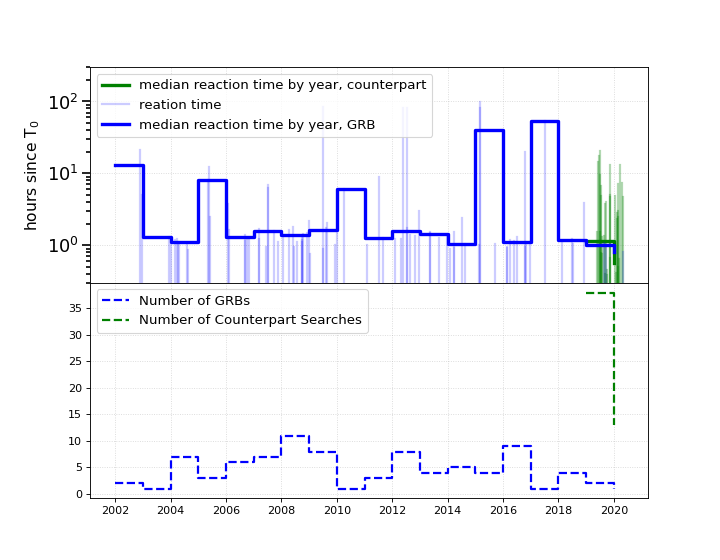

In [180]:
#plt.figure(figsize=(9,7))
f, (ax,ax1) = plt.subplots(2,1,figsize=(9,7), sharex=True)

#ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

ax.grid(ls=":", alpha=0.5)
ax1.grid(ls=":", alpha=0.5)

for E in counterpart_gcn_reactions:
    ax.plot(
            [dt(E['event_gcn_time']), dt(E['counterpart_gcn_time'])],        
            [0, (ts(E['counterpart_gcn_time'])-ts(E['event_gcn_time']))/3600.], 
            lw=2,
            c='g',
            ds='steps-post',
            alpha=0.3
        )
    
    
ax.step(
    [datetime(year=yr, month=1, day=1) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    [np.median([(ts(E['event_gcn_time'])-ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    lw=3,
    c='g',
    where='post',
    label='median reaction time by year, counterpart'
)

###### GRB
    

def m(E):
    if (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600.>100: return False
    return True
    
label = 'reation time'
for E in grb_gcn_reactions:
    if not m(E): continue
    
    ax.plot(
            [dt(E['event_t0']), dt(E['event_gcn_time'])],        
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600.], 
            lw=2,
            c='b',
            ds='steps-post',
            alpha=0.2,
            label=label
        )
    label=None

ax.step(
    [datetime(year=yr, month=1, day=1) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    [np.median([(ts(E['event_gcn_time'])-ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    lw=3,
    c='b',
    where='post',
    label='median reaction time by year, GRB'
)


ax.set_ylim([0.3,300])

ax.semilogy()

ax.set_ylabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

#ax2 = ax.twinx()

ax1.step(
    [datetime(year=yr, month=1, day=1) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    [len([(ts(E['event_gcn_time'])-ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    lw=2,
    c='b',
    ls="--",
    where='post',
    label='Number of GRBs'
)

ax1.step(
    [datetime(year=yr, month=1, day=1) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    [len([(ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    lw=2,
    c='g',
    ls="--",
    where='post',
    label='Number of Counterpart Searches'
)


plt.subplots_adjust(hspace=0)

ax.legend(prop=font_manager.FontProperties(size=12))
ax1.legend(prop=font_manager.FontProperties(size=12))

plt.savefig("reaction_time_history.png")
    

<IPython.core.display.Javascript object>


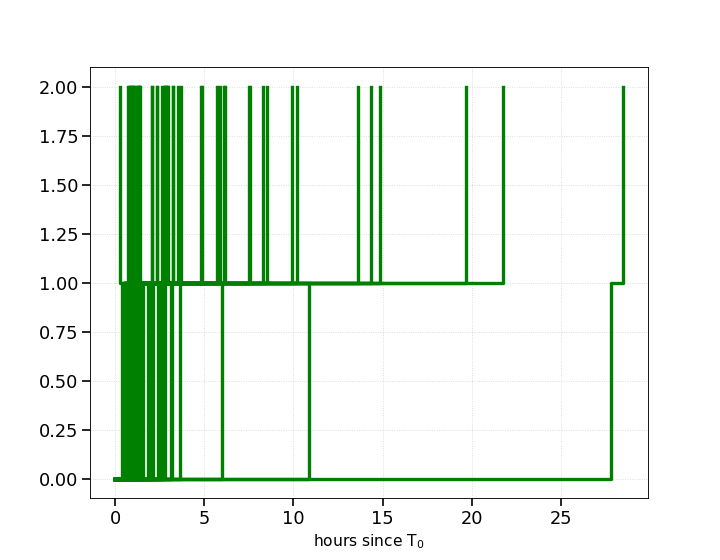

Text(0.5, 0, 'hours since T$_{0}$')

In [50]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

for E in gcn_reactions:
    plt.plot(
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600., (ts(E['counterpart_gcn_time'])-ts(E['event_t0']))/3600.], 
            [0, 1, 2],                    
            lw=3,
            c='g',
            ds='steps-post'
        )

ax.set_xlabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

    

<IPython.core.display.Javascript object>


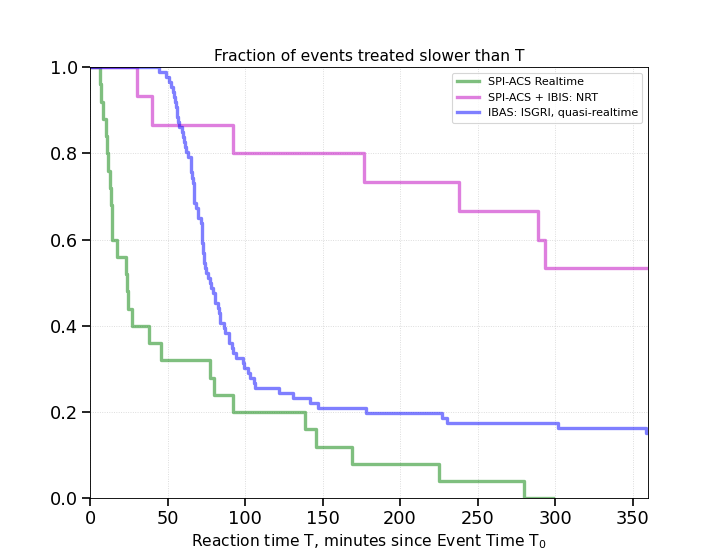

In [229]:
# add sleeping

plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)


def plothist(values, color, label):
    values=np.array(values)
    
    values = values[values>0]
        
    x = [0]+list(sorted(values))
    y = [1]+list(np.arange(len(values))[::-1]/(len(values)-1))
    
    plt.plot(
            x,
            y,
            alpha=0.5,
            lw=3,
            color=color,
            ds='steps-pre',
            label=label
        )

plothist(
    [(ts(E['counterpart_gcn_time'])-ts(E['event_gcn_time']))/60. for E in counterpart_gcn_reactions if 'ibis' not in E['instrument']],
    'g',
    "SPI-ACS Realtime"
)

plothist(
    [(ts(E['counterpart_gcn_time'])-ts(E['event_gcn_time']))/60. for E in counterpart_gcn_reactions if 'ibis' in E['instrument']],
    'm',
    "SPI-ACS + IBIS: NRT"
)

plothist(
    [(ts(E['event_gcn_time'])-ts(E['event_t0']))/60. for E in grb_gcn_reactions],
    'b',
    'IBAS: ISGRI, quasi-realtime' 
)

ax.set_xlim([0, 6*60])
ax.set_ylim([0, 1])


ax.set_xlabel("Reaction time T, minutes since Event Time T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

ax.set_title("Fraction of events treated slower than T", fontproperties=font_manager.FontProperties(size=14))

ax.legend()

#ax.semilogx()

plt.savefig("histogram.png")
    